# Predict the Next Chess Winner!

### The chess game contains more than 20,000 games. The dataset displays the winner, victory status, number of turns and other data for different users. By doing exploratory data analysis, the data will help to predict the next winner. 

#### The following columns are in the dataset along with a description
    ID - ID for game
    Rated - Game is official or training session
    Created At - Game start time
    Last Move At - Game end time
    Turns - Number of turns
    Victory Status - Game status if out of time, resign, draw or checkmate
    Winner - Winner of a game
    Increment Code - Started with x minutes and added x minutes to clock after each move
    White ID - Player ID
    White Rating - Estimate strength of player based on performance to other players
    Black ID - Player ID
    Black Rating - Estimate strength of player based on performance to other players
    Moves - Player moves
    Opening ECO -Standard code for given opening
    Opening Name - Name of game
    Opening Ply - Number of moves in opening phase

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [3]:
#Read dataset into memory
chess = pd.read_csv('data/chess_game.csv')

In [4]:
chess.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.500000e+12,1.500000e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.500000e+12,1.500000e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.500000e+12,1.500000e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.500000e+12,1.500000e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.500000e+12,1.500000e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


### Exploratory Data Analysis Section

#### The information in this section will provide the number of rows, columns, and data types of columns.

In [5]:
chess.shape # There are 20,058 rows & 16 columns

(20058, 16)

In [6]:
chess.columns #displays column names in the dataset

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [7]:
chess.dtypes #displays data types

id                 object
rated                bool
created_at        float64
last_move_at      float64
turns               int64
victory_status     object
winner             object
increment_code     object
white_id           object
white_rating        int64
black_id           object
black_rating        int64
moves              object
opening_eco        object
opening_name       object
opening_ply         int64
dtype: object

In [8]:
chess.info() # The column names are displayed with non-null, count and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


### This section provides a deeper look into the dataset such as index, mean, correlation of columns and other details. 

In [9]:
chess.index

RangeIndex(start=0, stop=20058, step=1)

In [10]:
chess.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483208e+12,1.483208e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.831972e+10,2.831967e+10,33.570585,291.253376,291.036126,2.797152
min,1.376770e+12,1.376770e+12,1.000000,784.000000,789.000000,1.000000
25%,1.479640e+12,1.479642e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.497030e+12,1.497030e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.500708e+12,1.500708e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504490e+12,1.504490e+12,349.000000,2700.000000,2723.000000,28.000000


In [11]:
pd.DataFrame(chess.head(3)[['rated', 'turns']])

,rated,turns
0,False,13
1,True,16
2,True,61


In [12]:
chess.corr() # Correlate displays all the columns that contain integers

,rated,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
rated,1.000000,-0.002633,-0.002635,0.090698,0.003284,0.032655,-0.001906
created_at,-0.002633,1.000000,1.000000,0.081677,0.112809,0.129518,0.098678
last_move_at,-0.002635,1.000000,1.000000,0.081683,0.112812,0.129520,0.098680
turns,0.090698,0.081677,0.081683,1.000000,0.129753,0.160467,0.055999
white_rating,0.003284,0.112809,0.112812,0.129753,1.000000,0.634171,0.277379
black_rating,0.032655,0.129518,0.129520,0.160467,0.634171,1.000000,0.255396
opening_ply,-0.001906,0.098678,0.098680,0.055999,0.277379,0.255396,1.000000


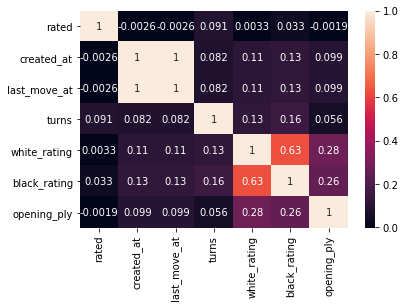

In [13]:
#Heatmap displays correlation matrix  
sns.heatmap(chess.corr(), annot=True);

In [14]:
chess.isnull().sum() #Displays any null values in columns

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [15]:
chess.std() #Displays standard deviation of each column

rated           3.958913e-01
created_at      2.831972e+10
last_move_at    2.831967e+10
turns           3.357058e+01
white_rating    2.912534e+02
black_rating    2.910361e+02
opening_ply     2.797152e+00
dtype: float64

In [18]:
chess.unique() #Trying to display any unique values in columns

AttributeError: 'DataFrame' object has no attribute 'unique'

### Data Visualizations and Value Counts

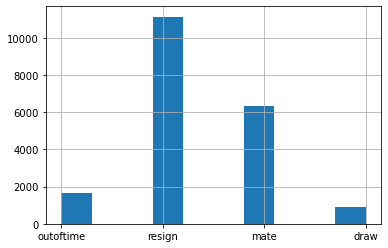

In [19]:
chess.victory_status.hist();

In [22]:
chess.winner.value_counts() #Displays value counts for winners

white    10001
black     9107
draw       950
Name: winner, dtype: int64

<AxesSubplot:>

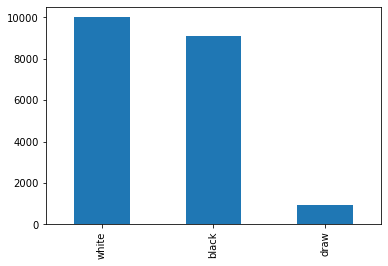

In [23]:
chess.winner.value_counts().plot(kind='bar')  

In [24]:
chess.victory_status.value_counts()

resign       11147
mate          6325
outoftime     1680
draw           906
Name: victory_status, dtype: int64

<AxesSubplot:>

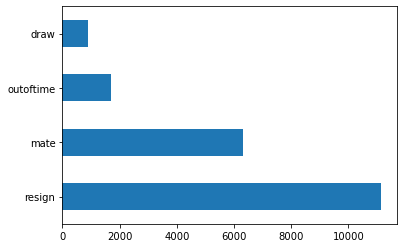

In [25]:
chess.victory_status.value_counts().plot(kind='barh')  

## Classification

In [ ]:
#Note for different class concepts that can be used for this dataset such as KNN classificain, decision tree or random forests or logistic regression -- ideas for classification

In [37]:
# Import the class.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Make an instance of a LinearRegression object.
lr = LinearRegression()
type(lr)

# Instantiate the model.
lr = LinearRegression()


In [39]:
# Train and Test split (X,y)

feature_cols = chess.columns.drop(['winner', 'victory_status'])
X = chess[feature_cols]
y = chess.victory_status


In [40]:
# Train the model on the entire data set.
lr.fit(X, y)

# Predict the response values for the observations in X ("test the model").
lr.predict(X)

ValueError: could not convert string to float: 'TZJHLljE'

In [36]:
# Check X's type.
print((type(X)))
print((type(X.values)))

# Check y's type.
print((type(y)))
print((type(y.values)))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
